# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** Faiz Noor Adhytia
- **Email:** m233b4ky1368@gmail.com
- **ID Dicoding:** faizadhytia

## Menentukan Pertanyaan Bisnis

<ol>
    <li>What product is need to be prioritize to getting an advertisement and improvements?</li>
    <li>What is the most under sell product, and how to boost the sell?</li>
    <li>If we want to launc a new product, what product criteria it needs to have so it can be a best seller in the market or atleast it can support the undersell product to have better sell?</li>
</ol>

## Import Semua Packages/Library yang Digunakan

In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium

## Data Wrangling

### Gathering Data

In [2]:
orders = pd.read_csv('E-Commerce Public Dataset/orders_dataset.csv')
products = pd.read_csv('E-Commerce Public Dataset/products_dataset.csv')
sellers = pd.read_csv('E-Commerce Public Dataset/sellers_dataset.csv')
category_translation = pd.read_csv('E-Commerce Public Dataset/product_category_name_translation.csv')
order_items = pd.read_csv('E-Commerce Public Dataset/order_items_dataset.csv')
customer_reviews = pd.read_csv('E-Commerce Public Dataset/order_reviews_dataset.csv') 

In [3]:
orders.head(10).style.background_gradient(cmap = "mako")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00
5,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01 00:00:00
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,nan,nan,2017-05-09 00:00:00
7,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07 00:00:00
8,76c6e866289321a7c93b82b54852dc33,f54a9f0e6b351c431402b8461ea51999,delivered,2017-01-23 18:29:09,2017-01-25 02:50:47,2017-01-26 14:16:31,2017-02-02 14:08:10,2017-03-06 00:00:00
9,e69bfb5eb88e0ed6a785585b27e16dbf,31ad1d1b63eb9962463f764d4e6e0c9d,delivered,2017-07-29 11:55:02,2017-07-29 12:05:32,2017-08-10 19:45:24,2017-08-16 17:14:30,2017-08-23 00:00:00


In [4]:
products.head(10).style.background_gradient(cmap = "mako")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.000000,287.000000,1.000000,225.000000,16.000000,10.000000,14.000000
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.000000,276.000000,1.000000,1000.000000,30.000000,18.000000,20.000000
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.000000,250.000000,1.000000,154.000000,18.000000,9.000000,15.000000
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.000000,261.000000,1.000000,371.000000,26.000000,4.000000,26.000000
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.000000,402.000000,4.000000,625.000000,20.000000,17.000000,13.000000
5,41d3672d4792049fa1779bb35283ed13,instrumentos_musicais,60.000000,745.000000,1.000000,200.000000,38.000000,5.000000,11.000000
6,732bd381ad09e530fe0a5f457d81becb,cool_stuff,56.000000,1272.000000,4.000000,18350.000000,70.000000,24.000000,44.000000
7,2548af3e6e77a690cf3eb6368e9ab61e,moveis_decoracao,56.000000,184.000000,2.000000,900.000000,40.000000,8.000000,40.000000
8,37cc742be07708b53a98702e77a21a02,eletrodomesticos,57.000000,163.000000,1.000000,400.000000,27.000000,13.000000,17.000000
9,8c92109888e8cdf9d66dc7e463025574,brinquedos,36.000000,1156.000000,1.000000,600.000000,17.000000,10.000000,12.000000


In [5]:
sellers.head(10).style.background_gradient(cmap = "mako")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
5,c240c4061717ac1806ae6ee72be3533b,20920,rio de janeiro,RJ
6,e49c26c3edfa46d227d5121a6b6e4d37,55325,brejao,PE
7,1b938a7ec6ac5061a66a3766e0e75f90,16304,penapolis,SP
8,768a86e36ad6aae3d03ee3c6433d61df,1529,sao paulo,SP
9,ccc4bbb5f32a6ab2b7066a4130f114e3,80310,curitiba,PR


In [6]:
category_translation.head(10).style.background_gradient(cmap = "mako")

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
5,esporte_lazer,sports_leisure
6,perfumaria,perfumery
7,utilidades_domesticas,housewares
8,telefonia,telephony
9,relogios_presentes,watches_gifts


In [7]:
order_items.head(10).style.background_gradient(cmap = "mako")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900000,13.290000
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.900000,19.930000
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.000000,17.870000
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.990000,12.790000
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.900000,18.140000
5,00048cc3ae777c65dbb7d2a0634bc1ea,1,ef92defde845ab8450f9d70c526ef70f,6426d21aca402a131fc0a5d0960a3c90,2017-05-23 03:55:27,21.900000,12.690000
6,00054e8431b9d7675808bcb819fb4a32,1,8d4f2bb7e93e6710a28f34fa83ee7d28,7040e82f899a04d1b434b795a43b4617,2017-12-14 12:10:31,19.900000,11.850000
7,000576fe39319847cbb9d288c5617fa6,1,557d850972a7d6f792fd18ae1400d9b6,5996cddab893a4652a15592fb58ab8db,2018-07-10 12:30:45,810.000000,70.750000
8,0005a1a1728c9d785b8e2b08b904576c,1,310ae3c140ff94b03219ad0adc3c778f,a416b6a846a11724393025641d4edd5e,2018-03-26 18:31:29,145.950000,11.650000
9,0005f50442cb953dcd1d21e1fb923495,1,4535b0e1091c278dfd193e5a1d63b39f,ba143b05f0110f0dc71ad71b4466ce92,2018-07-06 14:10:56,53.990000,11.400000


In [8]:
customer_reviews.head(10).style.background_gradient(cmap='mako')

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,nan,nan,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,nan,nan,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,nan,nan,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,nan,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,nan,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53
5,15197aa66ff4d0650b5434f1b46cda19,b18dcdf73be66366873cd26c5724d1dc,1,nan,nan,2018-04-13 00:00:00,2018-04-16 00:39:37
6,07f9bee5d1b850860defd761afa7ff16,e48aa0d2dcec3a2e87348811bcfdf22b,5,nan,nan,2017-07-16 00:00:00,2017-07-18 19:30:34
7,7c6400515c67679fbee952a7525281ef,c31a859e34e3adac22f376954e19b39d,5,nan,nan,2018-08-14 00:00:00,2018-08-14 21:36:06
8,a3f6f7f6f433de0aefbb97da197c554c,9c214ac970e84273583ab523dfafd09b,5,nan,nan,2017-05-17 00:00:00,2017-05-18 12:05:37
9,8670d52e15e00043ae7de4c01cc2fe06,b9bf720beb4ab3728760088589c62129,4,recomendo,aparelho eficiente. no site a marca do aparelho esta impresso como 3desinfector e ao chegar esta com outro nome...atualizar com a marca correta uma vez que é o mesmo aparelho,2018-05-22 00:00:00,2018-05-23 16:45:47


**Insight:**
Gathering semua dataset yang diperlukan untuk melakukan analisis atas objektif yang telah ditentukan

### Assessing Data

#### Orders

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [10]:
orders.duplicated().sum()

0

In [11]:
orders.describe().style.background_gradient(cmap='mako')

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


**Insight:**
Pada kolom [0] hingga [7] ditemukan tipe data yang belum sesuai

#### Products

In [12]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [13]:
products.duplicated().sum()

0

In [14]:
products.describe().style.background_gradient(cmap='mako')

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


**Insight:**
Pada kolom [0] dan [1] ditemukan tipe data yang belum sesuai

#### Sellers

In [15]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [16]:
sellers.duplicated().sum()

0

In [17]:
sellers.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
Pada kolom [0], [2], [3] ditemukan tipe data yang belum sesuai

#### Category

In [18]:
category_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [19]:
category_translation.duplicated().sum()

0

In [20]:
category_translation.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


**Insight:**
Pada kolom [0] dan [1] ditemukan tipe data yang belum sesuai

#### Order_Items

In [21]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [22]:
order_items.duplicated().sum()

0

In [23]:
order_items.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
Pada kolom [4] ditemukan tipe data yang belum sesuai

#### Customer_Reviews

In [24]:
customer_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
customer_reviews.duplicated().sum()

0

In [26]:
customer_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


### Cleaning Data

#### Data Orders Formating

In [27]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [28]:
orders[['order_id', 'customer_id', 'order_status']] = orders[['order_id', 'customer_id', 'order_status']].astype(str)

In [29]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


#### Data Products Formating

In [30]:
# Alternatively, if you want to convert specific columns:
products[['product_id', 'product_category_name']] = products[['product_id', 'product_category_name']].astype(str)

In [31]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32951 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


#### Data Order_Items Formating

In [32]:
order_items['shipping_limit_date'] = pd.to_datetime(order_items['shipping_limit_date'])

In [33]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


**Insight:**
Melakukan penyesuaian terhadapt Tipe Data objek pada kolom dengan indikasi 'Date' menjadi tipe data "datetime"

#### Customer_Reviews Formating

In [34]:
customer_reviews['review_creation_date'] = pd.to_datetime(customer_reviews['review_creation_date'])
customer_reviews['review_answer_timestamp'] = pd.to_datetime(customer_reviews['review_answer_timestamp'])

In [35]:
customer_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


**Insight:**
Melakukan penyesuaian terhadapt Tipe Data objek pada kolom dengan indikasi 'Date' menjadi tipe data "datetime"

#### Deleting All Missing Values in All Datasets

In [36]:
# List of dataframes and their corresponding names
dataframes = {
    'orders': orders,
    'products': products,
    'sellers': sellers,
    'category_translation': category_translation,
    'order_items': order_items,
    'customer_reviews': customer_reviews
}

# Display the first few rows of each dataframe
for name, df in dataframes.items():
    print(f"{name} DataFrame:")
    print(df.head(), "\n")

# Check for missing values in all datasets
missing_values = {name: df.isnull().sum() for name, df in dataframes.items()}
print("Missing Values:\n", missing_values)


orders DataFrame:
                           order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06 2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39 2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00      

## Exploratory Data Analysis (EDA)

### Explore Product and Orders Merged

In [37]:
merged_data = pd.merge(order_items, products, on='product_id')
merged_data = pd.merge(merged_data, orders, on='order_id')

**Insight:**
Melakukan merging antara product dan order untuk dianalisis bersamaan

## Visualization & Explanatory Analysis

#### Data After Merged

In [38]:
merged_data.head(10).style.background_gradient(cmap='mako')

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.900000,13.290000,cool_stuff,58.000000,598.000000,4.000000,650.000000,28.000000,9.000000,14.000000,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29 00:00:00
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.900000,17.960000,cool_stuff,58.000000,598.000000,4.000000,650.000000,28.000000,9.000000,14.000000,e6eecc5a77de221464d1c4eaff0a9b64,delivered,2017-06-28 11:52:20,2017-06-29 02:44:11,2017-07-05 12:00:33,2017-07-13 20:39:29,2017-07-26 00:00:00
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.900000,18.330000,cool_stuff,58.000000,598.000000,4.000000,650.000000,28.000000,9.000000,14.000000,4ef55bf80f711b372afebcb7c715344a,delivered,2018-05-18 10:25:53,2018-05-18 12:31:43,2018-05-23 14:05:00,2018-06-04 18:34:26,2018-06-07 00:00:00
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.900000,16.170000,cool_stuff,58.000000,598.000000,4.000000,650.000000,28.000000,9.000000,14.000000,30407a72ad8b3f4df4d15369126b20c9,delivered,2017-08-01 18:38:42,2017-08-01 18:55:08,2017-08-02 19:07:36,2017-08-09 21:26:33,2017-08-25 00:00:00
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.900000,13.290000,cool_stuff,58.000000,598.000000,4.000000,650.000000,28.000000,9.000000,14.000000,91a792fef70ecd8cc69d3c7feb3d12da,delivered,2017-08-10 21:48:40,2017-08-10 22:05:11,2017-08-11 19:43:07,2017-08-24 20:04:21,2017-09-01 00:00:00
5,a0f9acf0b6294ed8561e32cde1a966bc,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-03 15:23:46,55.900000,26.930000,cool_stuff,58.000000,598.000000,4.000000,650.000000,28.000000,9.000000,14.000000,4851b3bca4a48b395dfad7aa57c3f72a,delivered,2017-07-27 15:11:51,2017-07-28 15:23:46,2017-08-02 18:32:34,2017-08-31 20:19:52,2017-08-24 00:00:00
6,bbf796534aaf9c59f8da8c7982db56e0,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-03-26 03:28:44,64.900000,38.500000,cool_stuff,58.000000,598.000000,4.000000,650.000000,28.000000,9.000000,14.000000,c32c207d9ebf75958011557ac1624e2f,delivered,2018-03-18 21:00:44,2018-03-20 03:28:44,2018-03-20 18:08:45,2018-03-28 21:57:44,2018-04-12 00:00:00
7,c9ef97d2854afe64a3b4488bc2836af6,2,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-14 04:25:34,58.900000,18.120000,cool_stuff,58.000000,598.000000,4.000000,650.000000,28.000000,9.000000,14.000000,0a29abf475fb8039d2775913d6f0b6f0,delivered,2017-08-05 16:59:05,2017-08-08 04:25:34,2017-08-10 16:40:11,2017-08-14 18:13:03,2017-09-06 00:00:00
8,c9ef97d2854afe64a3b4488bc2836af6,1,436c8d57ff8d4aa254318e9bd9b48c83,48436dade18ac8b2bce089ec2a041202,2017-08-14 04:25:34,58.900000,17.830000,cool_stuff,54.000000,599.000000,6.000000,530.000000,30.000000,9.000000,14.000000,0a29abf475fb8039d2775913d6f0b6f0,delivered,2017-08-05 16:59:05,2017-08-08 04:25:34,2017-08-10 16:40:11,2017-08-14 18:13:03,2017-09-06 00:00:00
9,df2d910b8b5e5f461f67043489f9569d,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-06-09 14:31:21,55.900000,35.710000,cool_stuff,58.000000,598.000000,4.000000,650.000000,28.000000,9.000000,14.000000,2e76c1f2a920153d79cc98b634c50942,delivered,2017-06-05 12:22:19,2017-06-05

#### Overall Sales Trend Overtime

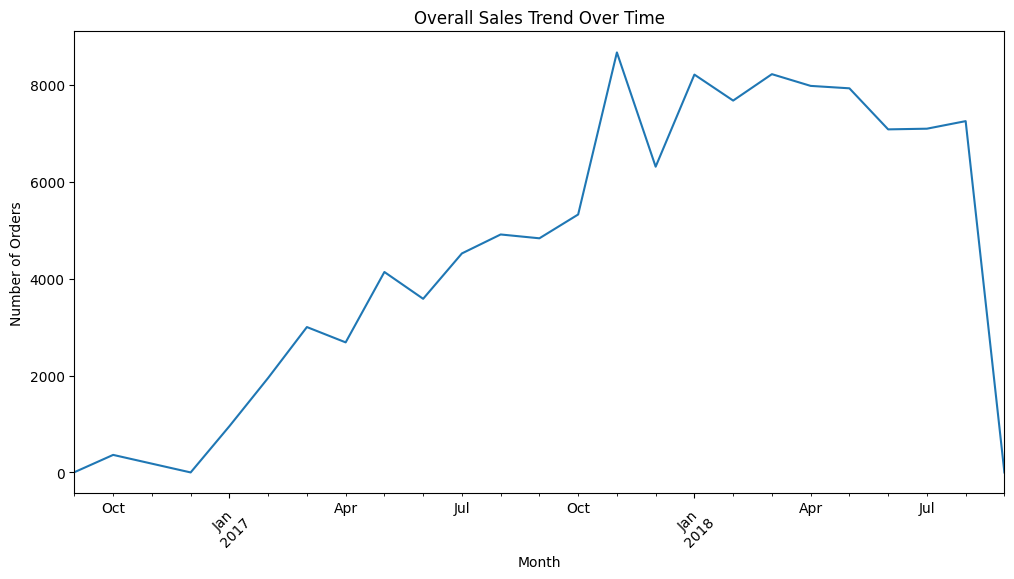

In [39]:
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])
sales_trend = merged_data.groupby(merged_data['order_purchase_timestamp'].dt.to_period('M')).size()
plt.figure(figsize=(12, 6))
sales_trend.plot(kind='line')
plt.title('Overall Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

#### Distribution of Order Status

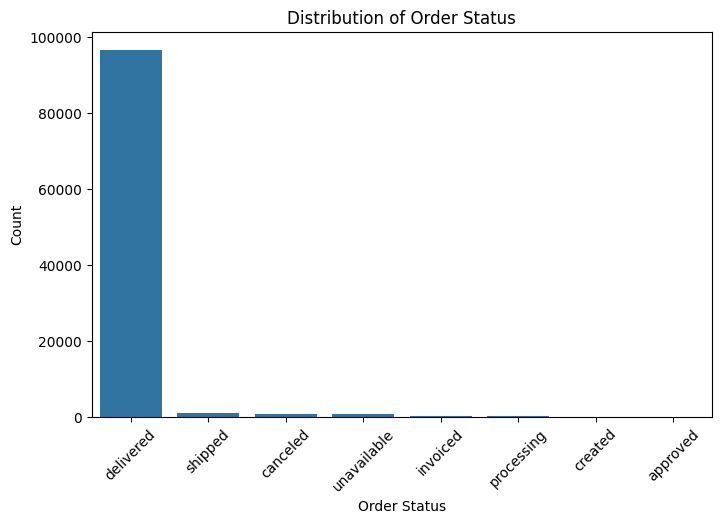

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(data=orders, x='order_status', order=orders['order_status'].value_counts().index)
plt.title('Distribution of Order Status')
plt.xlabel('Order Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

#### Product Category Analysis

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24568\3636066118.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette='mako')


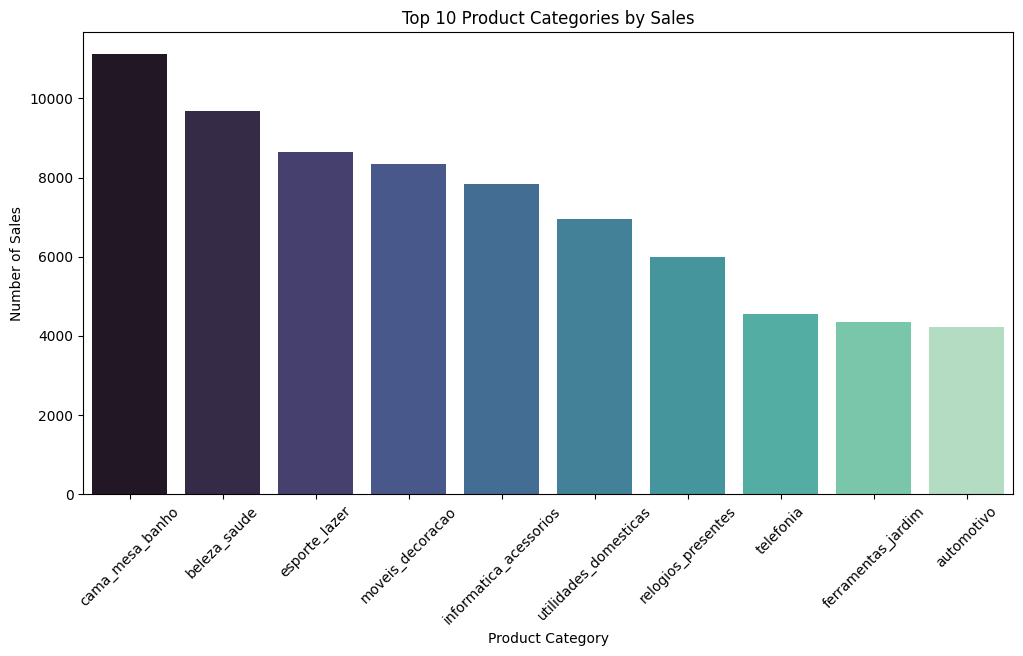

In [41]:
product_category_counts = merged_data['product_category_name'].value_counts().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=product_category_counts.index, y=product_category_counts.values, palette='mako')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Number of Sales')
plt.xticks(rotation=45)
plt.show()


#### Average Review Score Distribution

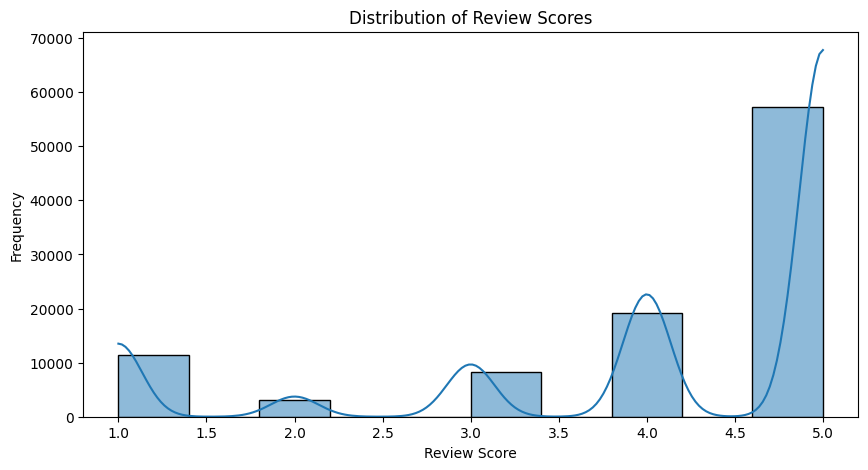

In [42]:
plt.figure(figsize=(10, 5))
sns.histplot(customer_reviews['review_score'], bins=10, kde=True)
plt.title('Distribution of Review Scores')
plt.xlabel('Review Score')
plt.ylabel('Frequency')
plt.show()

#### Average Product Price Analysis

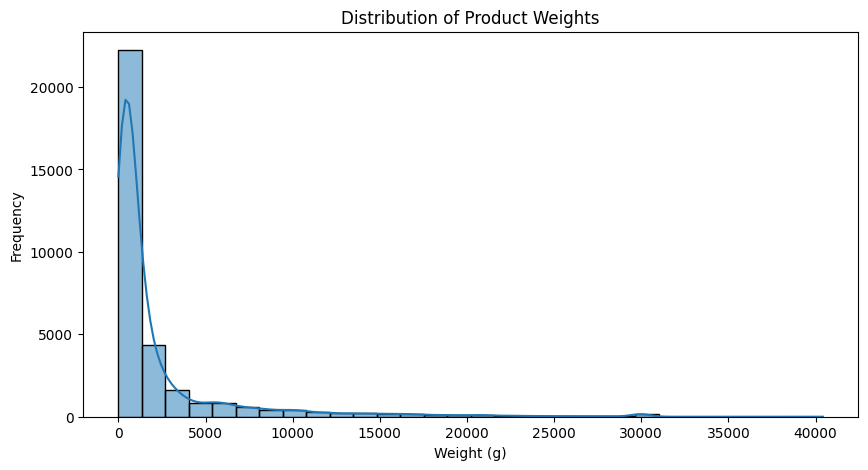

In [43]:
average_price = products['product_weight_g']  # Example; replace with actual price column if exists
plt.figure(figsize=(10, 5))
sns.histplot(average_price, bins=30, kde=True)
plt.title('Distribution of Product Weights')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')
plt.show()


**Insight:**
Secara overall sebenernya penjualan barang cukup baik, hal ini ditandai dengan review dengan skala 5 poin, <b style= "color:lightgreen">dengan ulasan pelanggan dominan berada di 5/5.</b>
<tr>
namun hal ini tetap perlu diperhatikan, sebab yang memberikan <b style= "color:red">ulasan 1/5 lebih banyak dari 3/5</b> walaupun kurang dari 4/5.
<tr>
penjualan keseluruhan cukup baik dan masih dikatakan meningkat dibanding tahun sebelumnya walaupun sedikit mengalami penurunan apabila dibandingkan dengan bulan oktober di tahun 2017.

### 1. What product is need to be prioritize to getting an advertisement and improvements?

In [44]:
sales_data = merged_data.groupby('product_category_name')['order_id'].count().reset_index(name='total_sales')
top_products = sales_data.sort_values(by='total_sales', ascending=False).head(10)

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24568\689173793.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_products, x='product_category_name', y='total_sales', palette=colors)


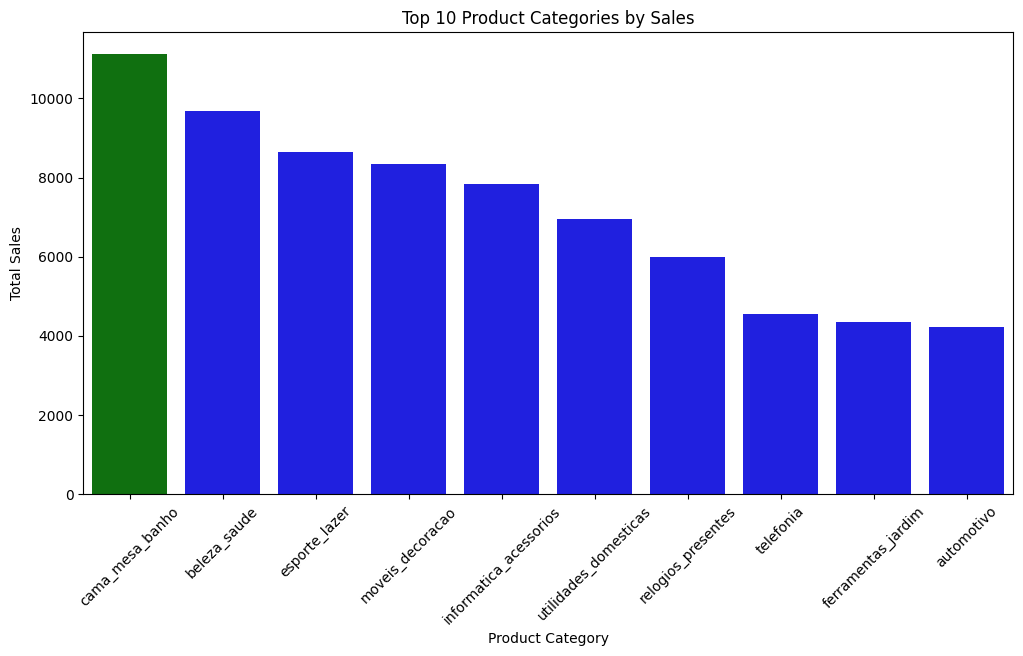

In [45]:
# Find the maximum value of the 'total_sales' column
max_value = top_products['total_sales'].max()

# Create a list of colors, with 'green' for the maximum value and 'blue' for others
colors = ['blue' if x != max_value else 'green' for x in top_products['total_sales']]

plt.figure(figsize=(12, 6))
sns.barplot(data=top_products, x='product_category_name', y='total_sales', palette=colors)
plt.title('Top 10 Product Categories by Sales')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

**Insight:**
Kategori "cama_mesa_banho" masih memimpin penjualan dengan <b style= "color:lightgreen">total sales lebih dari 10.000 penjualan</b>

### 2. What is the most under sell product, and how to boost the sell?

In [46]:
undersold_products = sales_data[sales_data['total_sales'] < 10]  # 10 for threshold
print("Undersold Products:\n", undersold_products)

Undersold Products:
             product_category_name  total_sales
37  fashion_roupa_infanto_juvenil            8
61                       pc_gamer            9
68             seguros_e_servicos            2


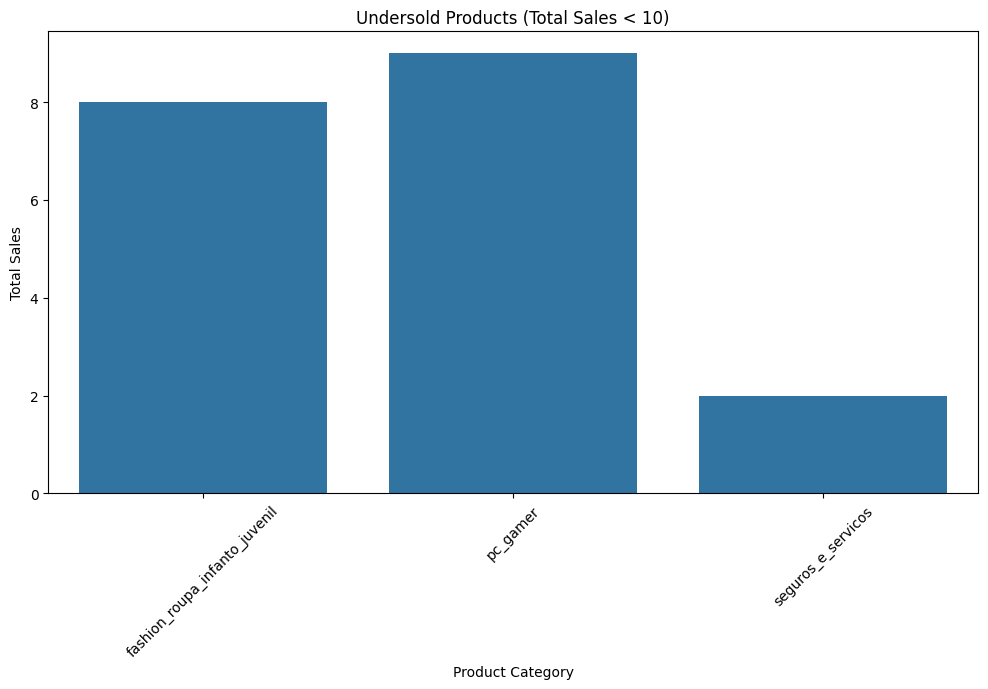

In [47]:
plt.figure(figsize=(12, 6))
sns.barplot(data=undersold_products, x='product_category_name', y='total_sales')
plt.title('Undersold Products (Total Sales < 10)')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.show()

C:\Users\lenovo\AppData\Local\Temp\ipykernel_24568\986478499.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=undersold_with_reviews, x='product_category_name', y='review_score', palette='mako')


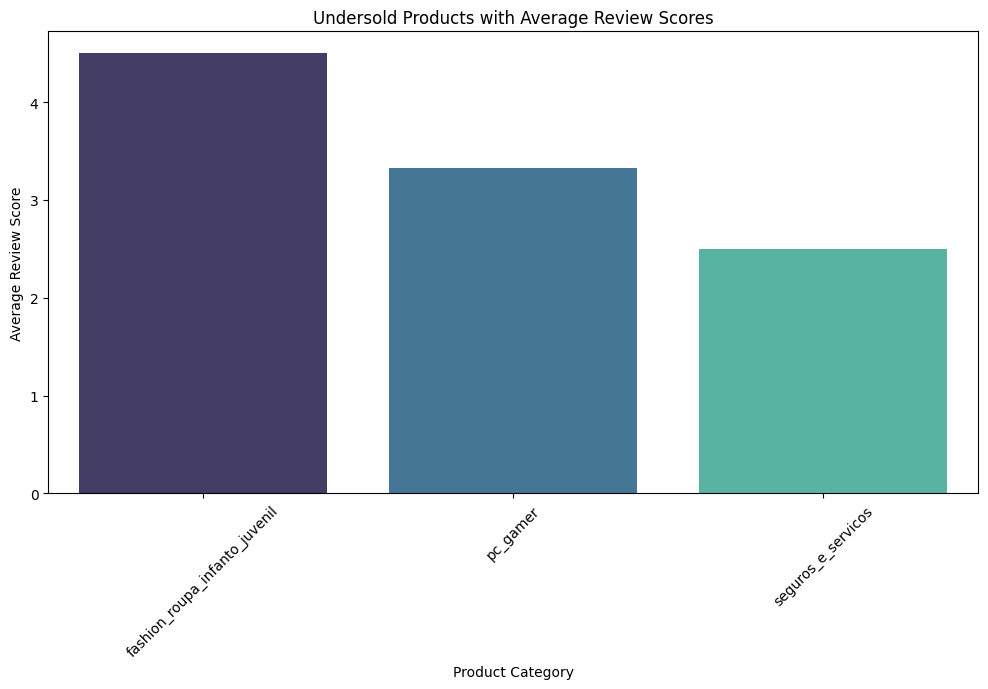

In [48]:
# Merge customer_reviews with order_items using 'order_id' to get 'product_id'
merged_reviews = pd.merge(customer_reviews, order_items, on='order_id')

# Merge with products to get 'product_category_name' in reviews data
merged_reviews = pd.merge(merged_reviews, products[['product_id', 'product_category_name']], on='product_id', how='left')

# Group by 'product_category_name' and calculate the mean review score
review_data = merged_reviews.groupby('product_category_name')['review_score'].mean().reset_index()

# Merge review data with undersold products using 'product_category_name'
undersold_with_reviews = pd.merge(undersold_products, review_data, on='product_category_name', how='left')

# Visualize undersold products with their average review scores
plt.figure(figsize=(12, 6))
sns.barplot(data=undersold_with_reviews, x='product_category_name', y='review_score', palette='mako')
plt.title('Undersold Products with Average Review Scores')
plt.xticks(rotation=45)
plt.xlabel('Product Category')
plt.ylabel('Average Review Score')
plt.show()


**Insight:**
Kategori bertema sport sulit untuk bersaing dengan produk pengguna general seperti produk Rumah tangga, ataupun fashion dan kecantikan. <b style= "color:red">total sales rendah dibanding produk rumah tangga dan kecantikan atau fashion</b>.
<tr>
untuk Boost penjualan maka <b style= "color:lightblue">pengiklanan diperlukan dengan improvisasi, serta market research yang benar-benar terfokus untuk pengguna sport</b>

### 3. If we want to launch a new product, what product criteria it needs to have so it can be a best seller in the market or atleast it can support the undersell product to have better sell?

In [49]:
# Analyze bestsellers and their characteristics
bestselling_products = sales_data[sales_data['total_sales'] >= 50]  # Example threshold for bestsellers
bestselling_product_details = pd.merge(bestselling_products, products, on='product_category_name')

In [50]:
# Analyze characteristics of bestselling products
characteristics = bestselling_product_details.describe()
print("Characteristics of Bestselling Products:\n", characteristics)

Characteristics of Bestselling Products:
         total_sales  product_name_lenght  product_description_lenght  \
count  32761.000000         32151.000000                32151.000000   
mean    5591.607857            48.486144                  772.272464   
std     3424.588383            10.243720                  635.520374   
min       60.000000             5.000000                    4.000000   
25%     2767.000000            42.000000                  340.000000   
50%     4545.000000            51.000000                  595.000000   
75%     8641.000000            57.000000                  974.000000   
max    11115.000000            76.000000                 3992.000000   

       product_photos_qty  product_weight_g  product_length_cm  \
count        32151.000000      32759.000000       32759.000000   
mean             2.189139       2277.607772          30.818889   
std              1.737921       4279.920754          16.900029   
min              1.000000          0.000000  

In [51]:
# Analyze characteristics of bestselling products
characteristics = bestselling_product_details.describe()
print("Characteristics of Bestselling Products:\n", characteristics)

Characteristics of Bestselling Products:
         total_sales  product_name_lenght  product_description_lenght  \
count  32761.000000         32151.000000                32151.000000   
mean    5591.607857            48.486144                  772.272464   
std     3424.588383            10.243720                  635.520374   
min       60.000000             5.000000                    4.000000   
25%     2767.000000            42.000000                  340.000000   
50%     4545.000000            51.000000                  595.000000   
75%     8641.000000            57.000000                  974.000000   
max    11115.000000            76.000000                 3992.000000   

       product_photos_qty  product_weight_g  product_length_cm  \
count        32151.000000      32759.000000       32759.000000   
mean             2.189139       2277.607772          30.818889   
std              1.737921       4279.920754          16.900029   
min              1.000000          0.000000  

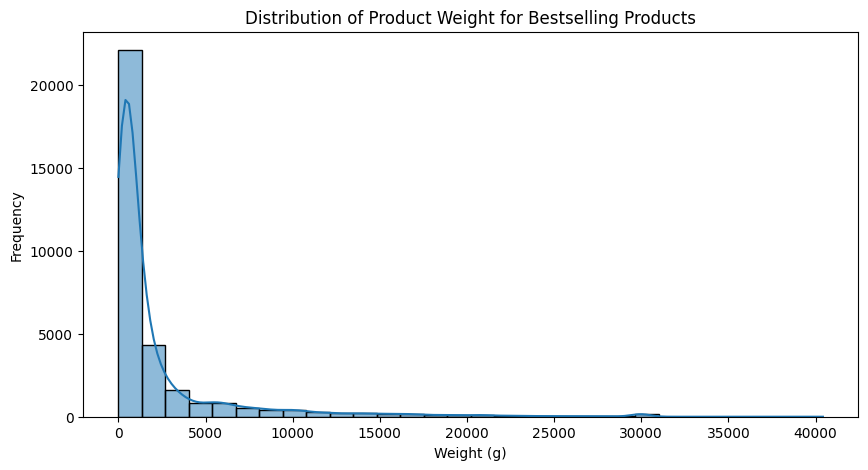

In [52]:
# Visualize some characteristics
plt.figure(figsize=(10, 5))
sns.histplot(bestselling_product_details['product_weight_g'], bins=30, kde=True)
plt.title('Distribution of Product Weight for Bestselling Products')
plt.xlabel('Weight (g)')
plt.ylabel('Frequency')
plt.show()

**Insight:**
Barang yang laku, dominan memiliki bobot ringan dengan dimensi yang tidak terlalu besar.

## RFM Analysis

In [56]:
# Merge orders and order_items to get the details of each order
merged_data = orders.merge(order_items, on='order_id')

# Convert the order creation date to datetime format
merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'])

# Calculate Recency
snapshot_date = merged_data['order_purchase_timestamp'].max() + pd.DateOffset(days=1)  # Date after last purchase
merged_data['Recency'] = (snapshot_date - merged_data['order_purchase_timestamp']).dt.days

# Calculate Frequency and Monetary
rfm_df = merged_data.groupby('customer_id').agg({
    'Recency': 'min',  # Last purchase recency
    'order_id': 'nunique',  # Unique order count
    'price': 'sum'  # Total expenditure
}).rename(columns={'order_id': 'Frequency', 'price': 'Monetary'})

# Display RFM DataFrame
print(rfm_df.head())

                                  Recency  Frequency  Monetary
customer_id                                                   
00012a2ce6f8dcda20d059ce98491703      293          1     89.80
000161a058600d5901f007fab4c27140      414          1     54.90
0001fd6190edaaf884bcaf3d49edf079      552          1    179.99
0002414f95344307404f0ace7a26f1d5      383          1    149.90
000379cdec625522490c315e70c7a9fb      154          1     93.00


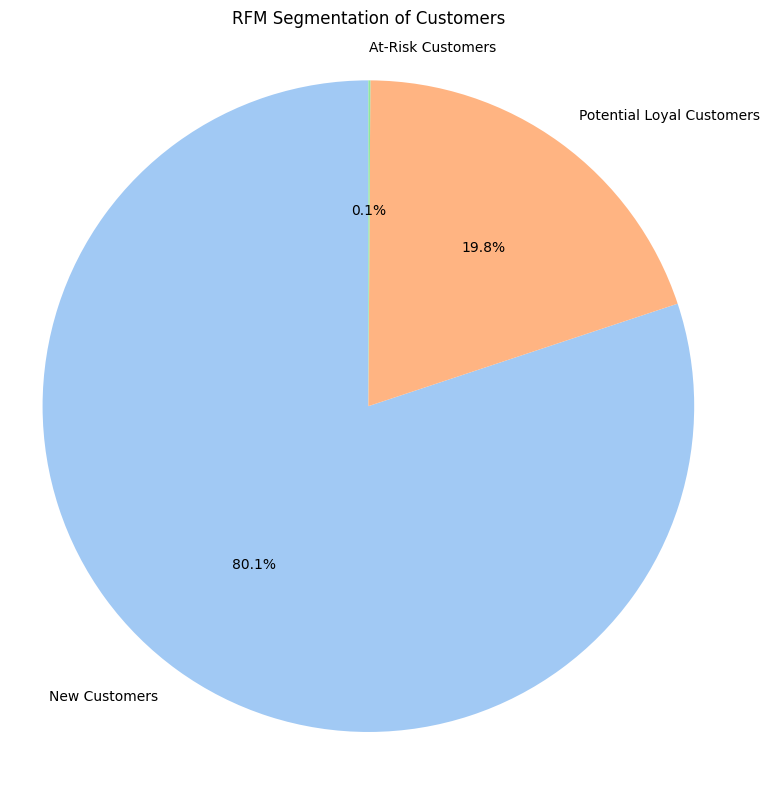

In [66]:
def rfm_segment(row):
    if row['Recency'] < 100 and row['Frequency'] > 5 and row['Monetary'] > 200:
        return 'High-Value Customers'
    elif row['Recency'] < 100 and row['Frequency'] <= 5:
        return 'Potential Loyal Customers'
    elif row['Recency'] > 100 and row['Frequency'] == 1:
        return 'New Customers'
    else:
        return 'At-Risk Customers'

# Apply segmentation
rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)

# Count the occurrences of each segment
segment_counts = rfm_df['Segment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('RFM Segmentation of Customers')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular
plt.tight_layout()
plt.show()

**Insight:**
Potential Royal Customer sangat tinggi yang berarti memiliki pertanda sangat baik, selain itu sangat banyak pembeli baru yang mengindikasikan kesuburan

## Conclusion

<ol>
    <li>What product is need to be prioritize to getting an advertisement and improvements?</li>
    <li>What is the most under sell product, and how to boost the sell?</li>
    <li>If we want to launc a new product, what product criteria it needs to have so it can be a best seller in the market or atleast it can support the undersell product to have better sell?</li>
</ol>

<b>INSIGHT:</b>
<ol>
    <li><b>Prioritaskan improvement dan advertising pada produk bidang rumah tangga.</b> selain memiliki pasar generalis di mana semua kalangan merupakan customer potensial, produk rumah tangga juga merupakan kategori produk best seller </li>
    <li><b>Fokus pada market research dan lakukan pengiklanan sesuai market</b>, tidak disarankan untuk mengambil pasar general karena akan sulit bersaing dikarenakan produk memiliki segmentasi market yang terkhusus atau kecil</li>
    <li>
    <b>Nama Deskriptif dan Detail:</b> Produk dengan nama yang lebih deskriptif dan deskripsi panjang serta jelas cenderung lebih sukses. Produk baru sebaiknya memiliki nama yang menarik perhatian dan deskripsi lengkap yang jelas untuk menarik minat pelanggan.

<b>Visual Berkualitas Tinggi:</b> Produk dengan lebih banyak foto cenderung lebih laku. Pastikan produk baru memiliki gambar berkualitas tinggi yang menunjukkan produk dari berbagai sudut dan dalam berbagai konteks.

<b>Dimensi dan Berat Seimbang:</b> Meskipun produk terlaris memiliki berbagai ukuran dan berat, produk dengan berat dan dimensi yang praktis serta mudah dikelola lebih mungkin sukses, terutama di lingkungan e-commerce di mana pengiriman dan penyimpanan dapat mempengaruhi keputusan pelanggan.

<b>Meningkatkan Penjualan Produk yang Kurang Laku:</b> Fokus pada produk yang kurang laku dalam kategori di mana terdapat produk terlaris dengan atribut serupa. Menawarkan bundel produk atau kampanye pemasaran yang menampilkan produk kurang laku bersama produk terlaris dapat membantu meningkatkan penjualan.
    </li>
</ol>

